<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-и-изучение-файла" data-toc-modified-id="Чтение-и-изучение-файла-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение и изучение файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-датасета-на-выборки" data-toc-modified-id="Разделение-датасета-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение датасета на выборки</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Стандартизация</a></span></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Гиперпараметры-моделей" data-toc-modified-id="Гиперпараметры-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Гиперпараметры моделей</a></span></li><li><span><a href="#Уменьшение-и-увеличение-выборки" data-toc-modified-id="Уменьшение-и-увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение и увеличение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 


Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Чтение и изучение файла

In [437]:
!pip install -U scikit-learn -q

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [439]:
data_bank = pd.read_csv('/datasets/Churn.csv')

In [440]:
data_bank.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**`Описание данных`**  

**Признаки**   
- RowNumber — индекс строки в данных  
- CustomerId — уникальный идентификатор клиента  
- Surname — фамилия  
- CreditScore — кредитный рейтинг  
- Geography — страна проживания  
- Gender — пол  
- Age — возраст  
- Tenure — сколько лет человек является клиентом банка  
- Balance — баланс на счёте  
- NumOfProducts — количество продуктов банка, используемых клиентом  
- HasCrCard — наличие кредитной карты  
- IsActiveMember — активность клиента  
- EstimatedSalary — предполагаемая зарплата  

**Целевой признак**  
- Exited — факт ухода клиента  

Приведем названия столбцов к нижнему регистру и переименуем для читаемости.

In [441]:
data_bank.columns = data_bank.columns.str.lower()
data_bank.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'is_active_member', 'estimated_salary', 'exited']

In [442]:
data_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
num_of_products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
has_crcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
is_active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [443]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
row_number          10000 non-null int64
customer_id         10000 non-null int64
surname             10000 non-null object
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              9091 non-null float64
balance             10000 non-null float64
num_of_products     10000 non-null int64
has_crcard          10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null float64
exited              10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Всего в датасете 10 тыс. строк.
Имеются пропуски в столбце Tenure - сколько лет человек является клиентом банка.  
Столбец rownumber дублирует индексы датасета (за иключением того, что индексы с 0) и не несет в себе уникальной информации.   
Имеется три колонки с категориальными признаками типа object - surname, geography, gender.   
Столбец surname: клиенты могут быть однофамильцами и при этом, иметь различное поведение в плане обсуживания в банке, поэтому на основании этого признака модель может неверно обучится. Данный столбец можно удалить.  
Для колонок geography, gender рассмотрим подробнее уникальные значения.

In [444]:
print(data_bank['geography'].unique())
data_bank['gender'].unique()

['France' 'Spain' 'Germany']


array(['Female', 'Male'], dtype=object)

В данных имеются клиенты из трех стран и двух полов. Для обучения модели категориальные признаки необходимо преобразовать в количественные. Для вышеуказанных столбцов это возможно сделать с помощью OHE.  
Рассмотрим столбец с пропусками в данных tenure (909 пропущенных значений из 10000).
Вычислим коэффициент коррелияции по столбцу.

In [445]:
data_bank.corr()[['tenure']]

,tenure
row_number,-0.007322
customer_id,-0.021418
credit_score,-0.000062
age,-0.013134
tenure,1.000000
balance,-0.007911
num_of_products,0.011979
has_crcard,0.027232
is_active_member,-0.032178
estimated_salary,0.010520


Зависимости не не наблюдается.  
Рассмотрим какие и сколько значений входят в этот столбец.

In [446]:
data_bank['tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Для клиентов с пропусками их количество находится в том же диапазаоне, что и для клиентов с различным числом лет обслуживания в банке 909 клиентов. 
Рассмотрим распределение пропусков в столбце в зависимости от целевого признака.

In [447]:
(pd.DataFrame(data_bank.query('tenure.isna()')['exited'].value_counts())).join(
    (pd.DataFrame(data_bank['exited'].value_counts())), rsuffix='_all')

,exited,exited_all
0,726,7963
1,183,2037


Имеется около 10% пропущенных значений в столбце tenure. По признаку ухода клиента из банка соотношение пропусков так же, в около 10 % от всех. Пропуски негативно повлияют на обучение модели, их нужно обработать.  

Проверим наличие дубликатов в датасете.

In [448]:
print('Дубликатов в датасете - ', data_bank.duplicated().sum())

Дубликатов в датасете -  0


In [449]:
print('В', data_bank['surname'].duplicated().sum(), 'строках встречаются одинковые фамилии килентов')

В 7068 строках встречаются одинковые фамилии килентов


In [450]:
print('Дубликатов в столбце customer_id - ', data_bank['customer_id'].duplicated().sum())

Дубликатов в столбце customer_id -  0


Рассмотрим уникальные значения целевого признака exited

In [451]:
data_bank['exited'].unique()

array([1, 0])

In [452]:
data_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
num_of_products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
has_crcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
is_active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Целевой признак - столбец exited. В нем содержится информация о факте ухода клиента - 0 - не ушел, 1 - ушел. Значит предстоит решить задачу классификации.

**Вывод**
***
- Всего в датасете 10 тыс. строк и 14 столбцов. Из них 3 колонки с признаками типа object.
- Имеются пропуски в столбце Tenure (сколько лет человек является клиентом банка) - около 10 % пропущенных значений. Для обучения модели пропуски необходимо обработать.
- Дубликатов в датасете не обнаружено.
- Столбцы surname, row_number и customer_id несут в себе персонифицированную информацию, поэтому в целях обучения модели их нужно удалить.
- В датасете обнаружено три признака типа object - surname, geography, gender. Столбцы geography, gender для обучения модели возможно обработать методом OHE (привести к числу).
- Определен целевой признак - столбец exited - два значения 0 и 1. Необходимо решить задачу классификации. 

### Предобработка данных

Заменим пропуски в столбце tenure на значение, которого нет в датасете. Так как истиное значение узнать невозможно, а корреляция не показала сильной зависимости с каким-либо другим признаком в датасете.

In [453]:
data_bank.loc[data_bank['tenure'].isna(), 'tenure'] = data_bank['tenure'].apply(lambda x: np.random.randint(1, 10))

In [455]:
data_bank['tenure'].isna().sum()

0

In [456]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
row_number          10000 non-null int64
customer_id         10000 non-null int64
surname             10000 non-null object
credit_score        10000 non-null int64
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null float64
balance             10000 non-null float64
num_of_products     10000 non-null int64
has_crcard          10000 non-null int64
is_active_member    10000 non-null int64
estimated_salary    10000 non-null float64
exited              10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Приведем типы даных к меньшему объему.

In [457]:
data_bank = data_bank.astype({'credit_score': 'int16',
                             'age': 'int16',
                             'tenure': 'int16',
                             'num_of_products': 'int16',
                             'has_crcard': 'int8',
                             'is_active_member': 'int8',
                             'exited': 'int8'})

In [458]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
row_number          10000 non-null int64
customer_id         10000 non-null int64
surname             10000 non-null object
credit_score        10000 non-null int16
geography           10000 non-null object
gender              10000 non-null object
age                 10000 non-null int16
tenure              10000 non-null int16
balance             10000 non-null float64
num_of_products     10000 non-null int16
has_crcard          10000 non-null int8
is_active_member    10000 non-null int8
estimated_salary    10000 non-null float64
exited              10000 non-null int8
dtypes: float64(2), int16(4), int64(2), int8(3), object(3)
memory usage: 654.4+ KB


Удалим столбцы, несущие лишнюю персонализированную информацию для обучения модели, такие столбцы это:
- row_number,
- customer_id,
- surname.

In [459]:
data_bank = data_bank.drop(['row_number', 'customer_id', 'surname'], axis=1)

С помощью OHE преобразуем категориальные столбцы gender и geography. Чтобы исключить дамми-ловушку удалим первый столбец.

In [460]:
data_bank = pd.get_dummies(data=data_bank, drop_first=True)
data_bank.head()

,credit_score,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Рассмотрим так же количество уникальных значений столбца credit_score.

In [461]:
len(data_bank['credit_score'].unique())

460

И проверим дубликаты после изменения датасета.

In [462]:
data_bank.duplicated().sum()

0

In [463]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
credit_score         10000 non-null int16
age                  10000 non-null int16
tenure               10000 non-null int16
balance              10000 non-null float64
num_of_products      10000 non-null int16
has_crcard           10000 non-null int8
is_active_member     10000 non-null int8
estimated_salary     10000 non-null float64
exited               10000 non-null int8
geography_Germany    10000 non-null uint8
geography_Spain      10000 non-null uint8
gender_Male          10000 non-null uint8
dtypes: float64(2), int16(4), int8(3), uint8(3)
memory usage: 293.1 KB


**Вывод**
***
- С помощью техники OHE столбцы geography, gender были приведены к числовому типу.
- Пропущенные значения в колонке tenure были заполнены значением (-1), которое отсутствовало в датасете.
- Типы данных были приведены к типам с меньшим количеством затрачиваемой памяти.
- Удалены столбцы с персонализированной информацией - row_number, customer_id, surname.
- Для обучения модели получили датасет размером (10000, 12)

## Исследование задачи

### Разделение датасета на выборки

Целевой признак - факт ухода клиента exited (0, 1).  
Разделим датасет на три выборки: обучающую, валидационную и тестовую в соотношении 60%-20%-20% соответственно.

In [464]:
features_data_bank = data_bank.drop('exited', axis=1)
target_data_bank = data_bank['exited']

In [465]:
print('Размер датасета с признаками', features_data_bank.shape)
print('Размер датасета с целевым признаком', target_data_bank.shape)

Размер датасета с признаками (10000, 11)
Размер датасета с целевым признаком (10000,)


In [466]:
features_train, features_valid, target_train, target_valid = train_test_split(features_data_bank, 
                                                                              target_data_bank, 
                                                                              test_size=0.4, 
                                                                              random_state=123)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid,
                                                                            test_size=0.5, 
                                                                            random_state=123)

In [467]:
print('Размер тренировочной выборки признаков:', features_train.shape, 'целевого признака:', target_train.shape, sep='\n')
print('Размер валидационной выборки признаков:', features_valid.shape, 'целевого признака:', target_valid.shape, sep='\n')
print('Размер тестовой выборки признаков:', features_test.shape, 'целевого признака:', target_test.shape, sep='\n')

Размер тренировочной выборки признаков:
(6000, 11)
целевого признака:
(6000,)
Размер валидационной выборки признаков:
(2000, 11)
целевого признака:
(2000,)
Размер тестовой выборки признаков:
(2000, 11)
целевого признака:
(2000,)


In [468]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9696,550,32,8,97514.07,1,1,1,199138.84,0,0,1
509,599,37,2,0.00,2,1,1,143739.29,0,1,0
621,656,40,10,167878.50,1,0,1,151887.16,0,1,0
7681,641,33,2,146193.60,2,1,1,55796.83,0,0,1
4265,709,32,4,147307.91,1,0,1,40861.55,0,0,1


**Вывод**
***
Исходный датасет разделен на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.

### Стандартизация

Исходные признаки имеют разный масштаб, поэтому модель может учесть, что один из признаков важнее другого. Чтобы этого избежать, стандартизируем признаки - 'credit_score', 'age', 'balance', 'estimated_salary', приведем среднее к 0 и стандартное отклонение к 1 ко всем выборкам с признаками.

In [469]:
features_train.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,6000.0,650.186167,96.665976,350.00,583.00,651.000,718.0000,850.00
age,6000.0,38.984167,10.692847,18.00,32.00,37.000,44.0000,92.00
tenure,6000.0,4.978000,2.875337,0.00,2.00,5.000,7.0000,10.00
balance,6000.0,76820.664757,62830.054890,0.00,0.00,97321.580,128265.6625,238387.56
num_of_products,6000.0,1.532833,0.584505,1.00,1.00,1.000,2.0000,4.00
has_crcard,6000.0,0.704000,0.456529,0.00,0.00,1.000,1.0000,1.00
is_active_member,6000.0,0.518167,0.499712,0.00,0.00,1.000,1.0000,1.00
estimated_salary,6000.0,99882.585395,57792.963860,11.58,50202.46,99649.585,149566.1025,199992.48
geography_Germany,6000.0,0.248500,0.432179,0.00,0.00,0.000,0.0000,1.00
geography_Spain,6000.0,0.249000,0.432470,0.00,0.00,0.000,0.0000,1.00


Рассмотрим оригинальное распределение признаков на графике, чье среднее значение сильно выше, по сравнению с другими признаками. Такие столбцы - это balance, estimated_salary (среднее 76820, 99882 соответственно). 

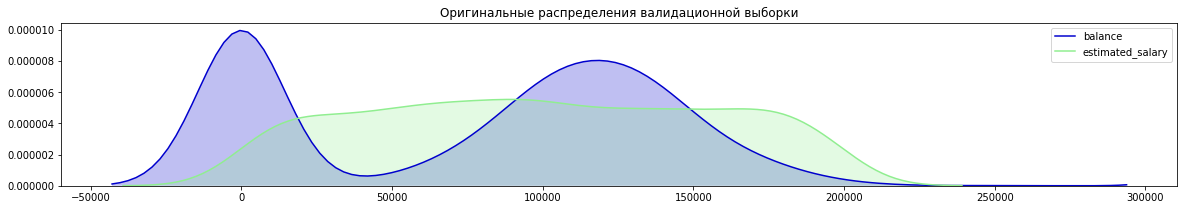

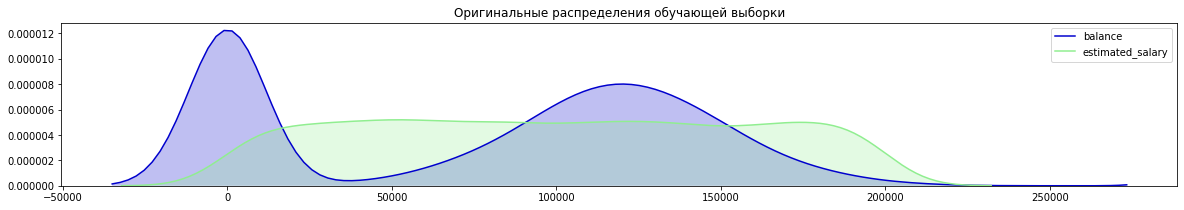

In [470]:
# KDE для валидационной выборки
fig, (ax1) = plt.subplots(ncols = 1, figsize = (20, 3))
ax1.set_title('Оригинальные распределения валидационной выборки')

sns.kdeplot(features_valid['balance'], ax = ax1, shade=True, legend=True, color='mediumblue')
sns.kdeplot(features_valid['estimated_salary'], ax = ax1, shade=True, legend=True, color='lightgreen')
plt.show()

# KDE для обучающей выборки
fig, (ax1) = plt.subplots(ncols = 1, figsize = (20, 3))
ax1.set_title('Оригинальные распределения обучающей выборки')


sns.kdeplot(features_train['balance'], ax = ax1, shade=True, legend=True, color='mediumblue')
sns.kdeplot(features_train['estimated_salary'], ax = ax1, shade=True, legend=True, color='lightgreen')
plt.show()

Распределение столбца признака balance бимодально с двумя пиками в обеих выборках. Распределение значений столбца  estimated_salary ближе к нормальному, но без ярко выраженного пика.  

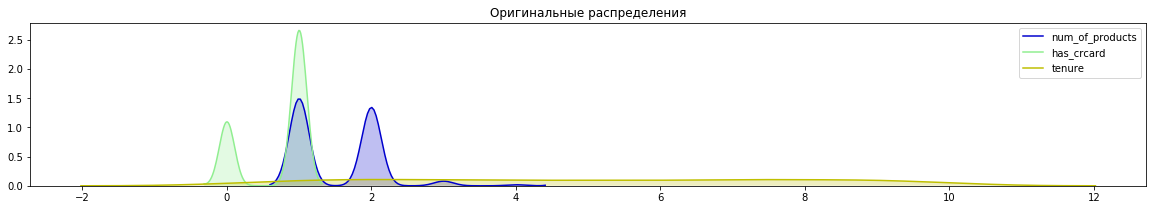

In [471]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (20, 3))
ax1.set_title('Оригинальные распределения')

sns.kdeplot(features_valid['num_of_products'], ax = ax1, shade=True, legend=True, color='mediumblue')
sns.kdeplot(features_valid['has_crcard'], ax = ax1, shade=True, legend=True, color='lightgreen')
sns.kdeplot(features_valid['tenure'], ax = ax1, shade=True, legend=True, color='y')
plt.show()

Средния значения разрых признаков находятся в разных диапазонах значений. Для того, чтобы при обучении моделей один признак не стал значительнее другого проведем стандартизацию признаков 'credit_score', 'age', 'balance', 'estimated_salary', 'tenure'.

In [472]:
pd.options.mode.chained_assignment = None

columns_fs = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure']


scaler = StandardScaler()
scaler.fit(features_train[columns_fs])

features_train[columns_fs] = scaler.transform(features_train[columns_fs])
features_valid[columns_fs] = scaler.transform(features_valid[columns_fs])
features_test[columns_fs] = scaler.transform(features_test[columns_fs])

In [473]:
features_train.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,6000.0,4.594843e-16,1.000083,-3.105655,-0.695092,0.008420,0.701586,2.067227
age,6000.0,-2.368476e-17,1.000083,-1.962613,-0.653217,-0.185576,0.469122,4.958479
tenure,6000.0,5.210647e-17,1.000083,-1.731420,-1.035791,0.007652,0.703281,1.746724
balance,6000.0,4.263256e-17,1.000083,-1.222776,-1.222776,0.326319,0.818864,2.571705
num_of_products,6000.0,1.532833e+00,0.584505,1.000000,1.000000,1.000000,2.000000,4.000000
has_crcard,6000.0,7.040000e-01,0.456529,0.000000,0.000000,1.000000,1.000000,1.000000
is_active_member,6000.0,5.181667e-01,0.499712,0.000000,0.000000,1.000000,1.000000,1.000000
estimated_salary,6000.0,-3.315866e-17,1.000083,-1.728226,-0.859694,-0.004032,0.859753,1.732360
geography_Germany,6000.0,2.485000e-01,0.432179,0.000000,0.000000,0.000000,0.000000,1.000000
geography_Spain,6000.0,2.490000e-01,0.432470,0.000000,0.000000,0.000000,0.000000,1.000000


Проведена стандартизация признаков, стандартное отклонение каждого признака не более 1.  
Выведем на экран графики распределений уже после стандартизации.

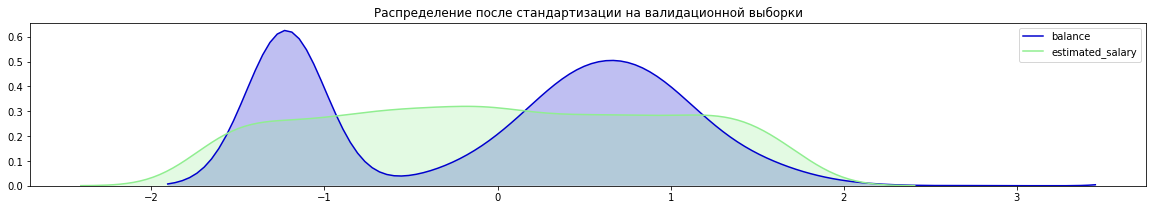

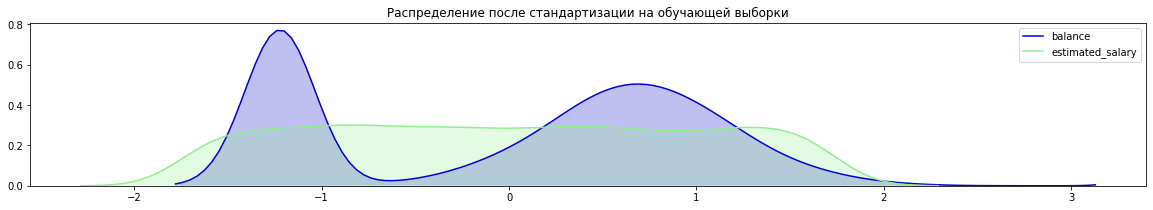

In [474]:
# fig, (ax1) = plt.subplots(ncols = 1, figsize = (20, 5))
# ax1.set_title('Распределение после стандартизации')

# sns.kdeplot(features_valid['balance'], ax = ax1, shade=True, legend=True, color='mediumblue')
# sns.kdeplot(features_valid['estimated_salary'], ax = ax1, shade=True, legend=True, color='lightgreen')
# plt.show()

# KDE для валидационной выборки
fig, (ax1) = plt.subplots(ncols = 1, figsize = (20, 3))
ax1.set_title('Распределение после стандартизации на валидационной выборки')

sns.kdeplot(features_valid['balance'], ax = ax1, shade=True, legend=True, color='mediumblue')
sns.kdeplot(features_valid['estimated_salary'], ax = ax1, shade=True, legend=True, color='lightgreen')
plt.show()

# KDE для обучающей выборки
fig, (ax1) = plt.subplots(ncols = 1, figsize = (20, 3))
ax1.set_title('Распределение после стандартизации на обучающей выборки')


sns.kdeplot(features_train['balance'], ax = ax1, shade=True, legend=True, color='mediumblue')
sns.kdeplot(features_train['estimated_salary'], ax = ax1, shade=True, legend=True, color='lightgreen')
plt.show()

**Вывод**
***

In [475]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


**Вывод**
***
- Была проведена стандартизация признаков 

### Баланс классов

Рассмотрим доли классов целевого признака - факта ухода клиента на всех выборках.

In [476]:
def class_frequency(data):    
    class_frequency_data = data.value_counts(normalize=True).to_frame()
    return class_frequency_data

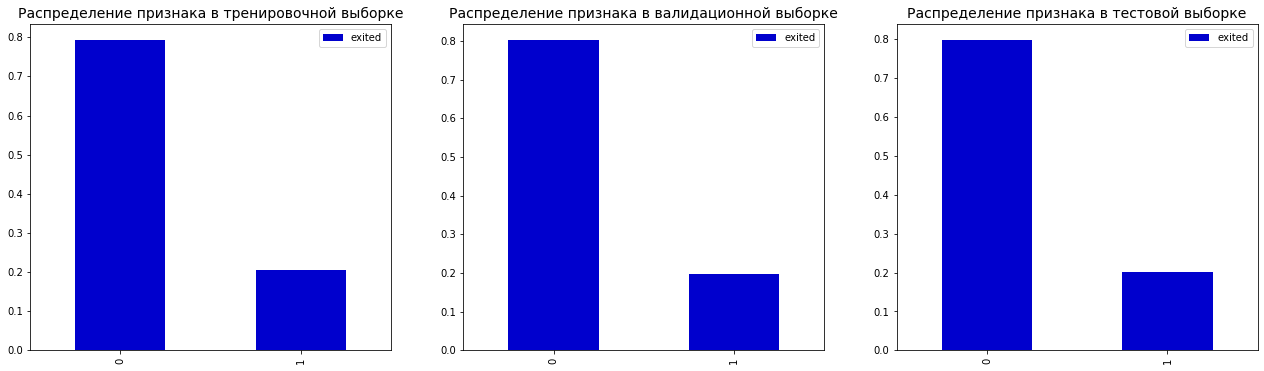

In [477]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))

class_frequency(target_train).plot(kind='bar', 
                                   ax=axes[0], 
                                   color='mediumblue').set_title('Распределение признака в тренировочной выборке', 
                                                          fontdict={'fontsize': 14})
class_frequency(target_valid).plot(kind='bar', 
                                   ax=axes[1], 
                                   color='mediumblue').set_title('Распределение признака в валидационной выборке', 
                                                                     fontdict={'fontsize': 14})
class_frequency(target_test).plot(kind='bar', 
                                  ax=axes[2], 
                                  color='mediumblue').set_title('Распределение признака в тестовой выборке', 
                                                                    fontdict={'fontsize': 14})

plt.show()

**Вывод**
****
Классы не сбалансированы. Соотношение классов целевого признака - факта ухода клиента (0, 1) ~4:1 (0,8 и 0,2 соответственно).




### Обучение моделей

Построим модели дерева решений, случайного леса и логистической регрессии без учета баланса классов. Найдем лучшие гиперпараметры и оценим модели метрикой F1 и AUC-ROC.  

Подготовим функции:
- для расчета метрик F1, AUC-ROC, Accuracy по модели - metrics_model
- для построения ROC кривой
- для построения тепловой карты матрицы ошибок

In [478]:
# функция для расчета метрик F1 и ROC_AUC   
def metrics_model(model, features=features_valid, target=target_valid):
    
    predictions = model.predict(features) # предсказания
    
    probabilities_valid = model.predict_proba(features) # вероятности
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc = roc_auc_score(target, probabilities_one_valid)
    
    f1 = f1_score(target, predictions)
    
    accuracy = model.score(features, target)
    
    return pd.DataFrame({'metric_result':[auc_roc, f1, accuracy]}, 
                        index=['AUC-ROC', 'F1', 'Accuracy'])

In [479]:
# функция для построения ROC -кривой
def plot_ROC(fpr, tpr, name='ROC-кривая'):
    plt.figure()

    plot_ROC = plt.plot(fpr, tpr, color='mediumblue')
    plot_ROC = plt.plot([0, 1], [0, 1], linestyle='--', color='r') # ROC-кривая случайной модели

    plt.xlim([0.0, 1.0]) #  границы осей 
    plt.ylim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
   
    return plot_ROC

In [480]:
# функция для построения тепловой карты по матрице ошибок модели
def heatmap_confusion_matrix(best_predictions, name='Матрица ошибок модели', target=target_valid):

    heatmap_1 = sns.heatmap((confusion_matrix(target, best_predictions)), 
                            cmap="YlGnBu", 
                            annot=True, fmt='d')
    
    heatmap_1.set_title(name, fontdict={'fontsize':14})
    heatmap_1.set_xlabel('Предсказания', fontsize=14)
    heatmap_1.set_ylabel('Ответы', fontsize=14)
    
    return heatmap_1

In [481]:
best_model_tree = None
best_result_tree = 0
best_depth = 0
best_sample = 0
best_auc_roc = 0 

for depth in range(1, 15): # глубина дерева от 1 до 6
    
    for sample in range(10, 100, 2): # минимальное количество выборок для разделения вн. узла 
        
        for leaf in range(1, 10):
            
            model_tree = DecisionTreeClassifier(random_state=5, 
                                           max_depth=depth, 
                                           min_samples_split = sample,
                                           min_samples_leaf=leaf) # создание модели

            model_tree.fit(features_train, target_train) # обучение на обучающей выборке

            predicted_valid = model_tree.predict(features_valid)

            result_f1 = f1_score(target_valid, predicted_valid, zero_division=0) # оценка точности предсказаний на вал. выборке 

            probabilities_valid = model_tree.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]

            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

            if result_f1 > best_result_tree: # сохранение параметров лучшей модели по F1
                
                best_model_tree = model_tree
                best_predicted_tree = predicted_valid

                best_result_tree = result_f1
                best_auc_roc = auc_roc 

                fpr_t, tpr_t, thresholds_t = roc_curve(target_valid, probabilities_one_valid)

print(f'F1 лучшей модели дерева решений: {best_result_tree:.3}')
print(f'AUC-ROC лучшей модели дерева решений: {best_auc_roc:.3}')
print('Гиперпараметры лучшей модели:', best_model_tree)

F1 лучшей модели дерева решений: 0.623
AUC-ROC лучшей модели дерева решений: 0.848
Гиперпараметры лучшей модели: DecisionTreeClassifier(max_depth=12, min_samples_leaf=6, min_samples_split=90,
                       random_state=5)


In [482]:
metrics_model(best_model_tree)

,metric_result
AUC-ROC,0.848402
F1,0.622721
Accuracy,0.865500


Построим график ROC кривую для лучшей модели дерева решений и матрицу ошибок.

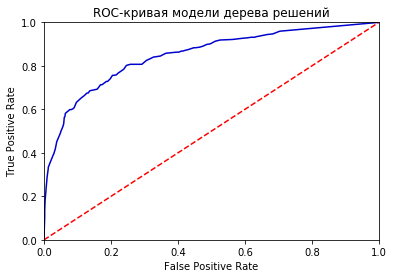

In [483]:
plot_ROC(fpr_t, tpr_t, name='ROC-кривая модели дерева решений')
plt.show()

Матрица ошибок для лучшей модели дерева решений.

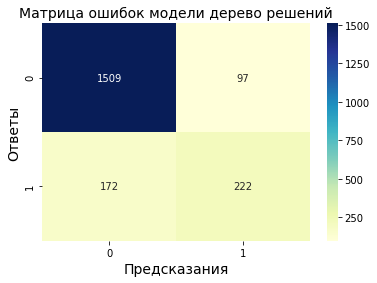

In [484]:
heatmap_confusion_matrix(best_predictions=best_predicted_tree, 
                         name='Матрица ошибок модели дерево решений')
plt.show()

- **Гиперпараметры лучшей модели дерева решений - max_depth=12, min_samples_leaf=6, min_samples_split=74, random_state=5**
- **F1 лучшей модели дерева решений - 0,62, AUC-ROC -0.84** 
- **Правильных прогнозов 1730, ложных - 270. Из 394 ответов класса 1 - 226 истинно положительных.**

**Случайный лес**

In [485]:
best_result_forest_f1 = 0
best_result_forest_auc = 0

best_model_forest = None 

best_estimators_forest = 0
best_depth_forest = 0

for est in range(84, 86): # количество деревьев
    
    for depth in range(18, 19): # глубина деревьев
        
        for sample in range(8, 10):
        

            model = RandomForestClassifier(random_state=5, 
                                           n_estimators=est, 
                                           max_depth=depth, min_samples_split=sample) # модель

            model.fit(features_train, target_train) # обучение на тренировочной выборке

            predicted_valid = model.predict(features_valid)

            result_f1 = f1_score(target_valid, predicted_valid, zero_division=0) # точность предсказаний на валидацонной выбоке

            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]

            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


            if result_f1 > best_result_forest_f1: # лучший результат

                best_model_forest = model # сохранить лучшую модель
                best_forest_predictions = predicted_valid # сохранить предсказания лучшей модели

                best_result_forest_f1 = result_f1 # сохранить лучшие результаты
                best_result_forest_auc = auc_roc

                fpr_f, tpr_f, thresholds_f = roc_curve(target_valid, probabilities_one_valid)
            
print(f'F1 наилучшей модели на валидационной выборке: {best_result_forest_f1:.3}')  
print(f'AUC-ROC наилучшей модели на валидационной выборке: {best_result_forest_auc:.3}')  
print('Гиперпараметры лучшей модели:', best_model_forest)

F1 наилучшей модели на валидационной выборке: 0.581
AUC-ROC наилучшей модели на валидационной выборке: 0.866
Гиперпараметры лучшей модели: RandomForestClassifier(max_depth=18, min_samples_split=8, n_estimators=84,
                       random_state=5)


In [486]:
metrics_model(best_model_forest)

,metric_result
AUC-ROC,0.866298
F1,0.580848
Accuracy,0.866500


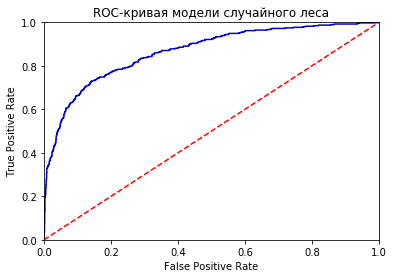

In [487]:
plot_ROC(fpr_f, tpr_f, name='ROC-кривая модели случайного леса')
plt.show()

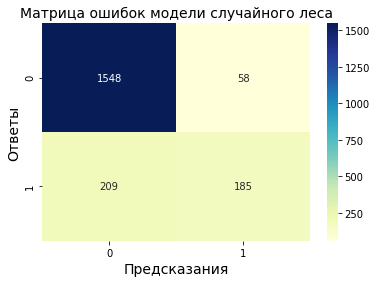

0    1606
1     394
Name: exited, dtype: int64

In [488]:
heatmap_confusion_matrix(best_predictions=best_forest_predictions, 
                         name='Матрица ошибок модели случайного леса')
plt.show()
target_valid.value_counts()

- **Гиперпараметры лучшей модели случайного леса - max_depth=18, min_samples_split=8, n_estimators=84, random_state=5**
- **F1 лучшей модели дерева решений - 0,59, AUC-ROC - 0.87** 
- **Истиных прогнозов 1747, ложных - 259. Из 394 ответов класса 1 - 187 истинно положительных.**

**Логистическая регрессия**

In [489]:
model_logistic = LogisticRegression(penalty='l2', random_state=5, solver='lbfgs', C=3)

model_logistic.fit(features_train, target_train)

predictions_logistic = model_logistic.predict(features_valid)

probabilities_valid_lg = model_logistic.predict_proba(features_valid)
probabilities_one_valid_lg = probabilities_valid_lg[:, 1]

fpr_lg, tpr_lg, thresholds_lg = roc_curve(target_valid, probabilities_one_valid_lg)

result_f1_log = f1_score(target_valid, predictions_logistic)
result_f1_log

metrics_model(model_logistic)

,metric_result
AUC-ROC,0.747016
F1,0.288973
Accuracy,0.813000


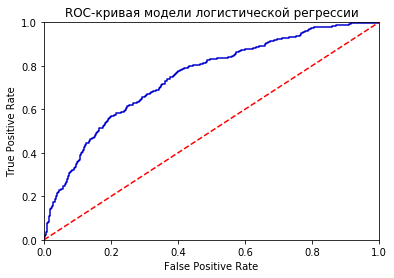

In [490]:
plot_ROC(fpr_lg, tpr_lg, name='ROC-кривая модели логистической регрессии')
plt.show()

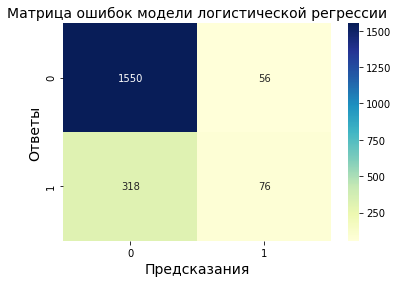

0    1606
1     394
Name: exited, dtype: int64

In [491]:
heatmap_confusion_matrix(best_predictions=predictions_logistic, 
                         name='Матрица ошибок модели логистической регрессии')
plt.show()
target_valid.value_counts()

- **построена модель логистической регрессии с гиперпараметрами penalty='l2', random_state=5, solver='lbfgs', C=3**
- **метрика F1-0.28, AUC-ROC-0.86.**
- **истинных предсказаний целевого признака 0 - 1548, 1 - 76.**

**Вывод**
***
- построены три модели - модель дерева решений, случайного леса и логистической регрессии без учета дисбаланса классов.
- лучший результат метрики F1 0,62 у модели дерева решений с гиперпараметрами max_depth=12, min_samples_leaf=6, min_samples_split=72, random_state=5, истинно положительных предсказаний так же, больше у данной модели.
- модель логистической регрессии показала наихудший результат метрики F1- 0,29. 
- классы целевого признака распределены в отношении 4:1 (0,1 соответственно).

## Борьба с дисбалансом

### Гиперпараметры моделей

Как было выяснено ранее, баланс класса 1 - в 4 раза ниже, чем класса 0.   

Возмем за основу модели с лучшими гиперпараметрами и сбалансируем классы, добавив гиперпараметр баланс классов.   
Посмотрим как изменятся метрики F1 и AUC-ROC.

In [492]:
best_model_tree

DecisionTreeClassifier(max_depth=12, min_samples_leaf=6, min_samples_split=90,
                       random_state=5)

In [493]:
balanced_model_tree = DecisionTreeClassifier(random_state=5, max_depth=9, 
                                             min_samples_split = 72, min_samples_leaf=6,
                                             class_weight='balanced')                              

balanced_model_tree.fit(features_train, target_train)

predicted_valid_tb = balanced_model_tree.predict(features_valid)

probabilities_valid_tb = balanced_model_tree.predict_proba(features_valid)
probabilities_one_valid_tb = probabilities_valid_tb[:, 1]

fpr_tb, tpr_tb, thresholds_tb = roc_curve(target_valid, probabilities_one_valid_tb)

metrics_model(balanced_model_tree)

,metric_result
AUC-ROC,0.851460
F1,0.584906
Accuracy,0.780000


In [494]:
balanced_model_tree = DecisionTreeClassifier(random_state=5, max_depth=9, 
                                             min_samples_split = 72, min_samples_leaf=6, 
                                             class_weight={0: 0.4, 1: 0.6})

balanced_model_tree.fit(features_train, target_train)

predicted_valid_tb = balanced_model_tree.predict(features_valid)

metrics_model(balanced_model_tree)

,metric_result
AUC-ROC,0.839496
F1,0.628032
Accuracy,0.862000


Только в случае применения гиперпараметра  class_weight={0: 0.4, 1: 0.6} удается добится результата метрики F1 выше на 0,4, чем без учета баланса классов. При добавлении class_weight='balanced' метрика F1 снижается.

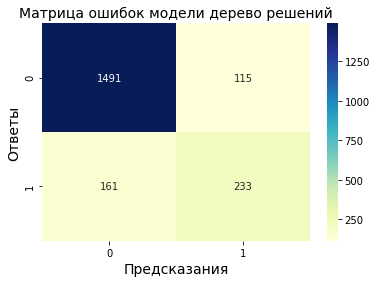

In [495]:
heatmap_confusion_matrix(best_predictions=predicted_valid_tb, 
                         name='Матрица ошибок модели дерево решений')
plt.show()

При этом, количество истинно положительных ответов увеличилось, по сравнению с моделью без учета баланса классов.

In [496]:
model = RandomForestClassifier(max_depth=18, min_samples_split=8, n_estimators=84, 
                               random_state=5, class_weight={0: 0.4, 1: 0.6})

model.fit(features_train, target_train)

predicted_valid  = model.predict(features_valid)

metrics_model(model)

,metric_result
AUC-ROC,0.864054
F1,0.589313
Accuracy,0.865500


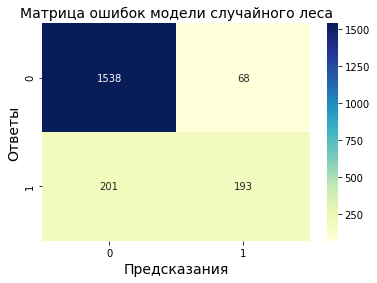

In [497]:
heatmap_confusion_matrix(best_predictions=predicted_valid, 
                         name='Матрица ошибок модели случайного леса')
plt.show()

**Вывод**
***

Метрика F1 увеличилась для модели случайного леса на 1.4  при установке гиперпараметра class_weight={0: 0.3, 1: 0.7}, и увеличилась для модели дерева решений с 0,626 до 0,63  

### Уменьшение и увеличение выборки

Приведем баланс классов техникой upsamling и downsample. Увеличим баланс класса 1 и уменьшим баланс класса 0. Проведем обучение модели на новых выборках.

Функция upsample увеличивает в выборке признак 1 в заданное количество раз, функция downsample уменьшает прзнак 0 на заданное чилло.

In [498]:
# функция для увеличения признака 1
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [499]:
# функция для уменьшения признака 0
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled



Увеличим признак 1 (факт ухода клиента) в 2 раза в обучающей выборке. Данные сохраним в новые переменные features_upsampled, target_upsampled.

In [500]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

Проверим количество класса целевого признака после увеличения в выборке признака 1.

In [501]:
print('Количество объектов с классом 1 до увеличения выборки', target_train.value_counts()[1])
print('Количество объектов с классом 1 после увеличения выборки', target_upsampled.value_counts()[1])

Количество объектов с классом 1 до увеличения выборки 1239
Количество объектов с классом 1 после увеличения выборки 2478


Обучим модель по новой выборке.

In [502]:
best_model_tree

DecisionTreeClassifier(max_depth=12, min_samples_leaf=6, min_samples_split=90,
                       random_state=5)

In [503]:
best_model_tree.fit(features_upsampled, target_upsampled)

predicted_valid_up = best_model_tree.predict(features_valid)

probabilities_valid_up = best_model_tree.predict_proba(features_valid)
probabilities_one_valid_up = probabilities_valid_up[:, 1]

fpr_up, tpr_up, thresholds_up = roc_curve(target_valid, probabilities_one_valid_up)

metrics_model(best_model_tree)

,metric_result
AUC-ROC,0.845994
F1,0.607443
Accuracy,0.836500


In [504]:
features_sampled, target_sampled = downsample(features_upsampled, target_upsampled, .7)

In [505]:
best_model_tree_sampled = None
best_result_tree_sampled = 0
best_depth_sampled = 0
best_sample_sampled = 0
best_auc_roc_sampled = 0 

for depth in range(1, 15): # глубина дерева от 1 до 6
    
    for sample in range(39, 45): # минимальное количество выборок для разделения вн. узла 
        
        for leaf in range(1, 10):
            
            model_tree = DecisionTreeClassifier(random_state=5, 
                                           max_depth=depth, 
                                           min_samples_split = sample,
                                           min_samples_leaf=leaf) # создание модели

            model_tree.fit(features_sampled, target_sampled) # обучение на обучающей выборке

            predicted_valid = model_tree.predict(features_valid)

            result_f1 = f1_score(target_valid, predicted_valid, zero_division=0) # оценка точности предсказаний на вал. выборке 

            probabilities_valid = model_tree.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]

            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

            if result_f1 > best_result_tree_sampled: # сохранение параметров лучшей модели по F1
                
                best_model_tree_sampled = model_tree
                best_predicted_tree_sampled = predicted_valid

                best_result_tree_sampled = result_f1
                best_auc_roc_sampled = auc_roc 

                fpr_ts, tpr_ts, thresholds_ts = roc_curve(target_valid, probabilities_one_valid)

print(f'F1 лучшей модели дерева решений: {best_result_tree:.3}')
print(f'AUC-ROC лучшей модели дерева решений: {best_auc_roc:.3}')
print('Гиперпараметры лучшей модели:', best_model_tree_sampled)

F1 лучшей модели дерева решений: 0.623
AUC-ROC лучшей модели дерева решений: 0.848
Гиперпараметры лучшей модели: DecisionTreeClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=40,
                       random_state=5)


На моделе дерева решений на метрику F1 больше влияет подбор гиперпараметров, чем увеличение/уменьшение выборок. После сэмплирования метрика F1 снизилась на 0.1 для модели с гиперпараметрами, которые были подобраны до балансировки классов.  

Рассмотрим то же для модели случаного леса.

In [506]:
best_model_forest

RandomForestClassifier(max_depth=18, min_samples_split=8, n_estimators=84,
                       random_state=5)

In [507]:
best_model_forest.fit(features_sampled, target_sampled)

predicted_valid_f = best_model_forest.predict(features_valid)

probabilities_valid_ff = best_model_forest.predict_proba(features_valid)
probabilities_one_valid_ff = probabilities_valid_ff[:, 1]

fpr_ff, tpr_ff, thresholds_ff = roc_curve(target_valid, probabilities_one_valid_ff)

metrics_model(best_model_forest)

,metric_result
AUC-ROC,0.868354
F1,0.628429
Accuracy,0.851000


Для модели случайного леса достигнута путем балансировки классов метрика F1 в 0,63, при этом без уета баланса метрика была равна 0,59.

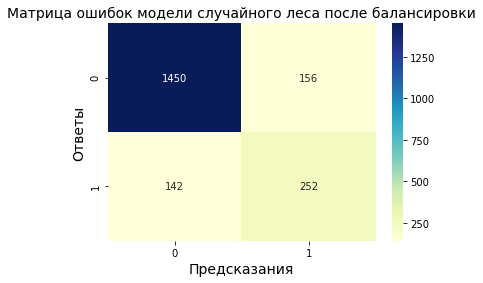

In [508]:
heatmap_confusion_matrix(best_predictions=predicted_valid_f, 
                         name='Матрица ошибок модели случайного леса после балансировки')
plt.show()

Увеличилось для модели случайного леса и количество истинно положительных предсказаний с 187 до 249.

**Вывод**
***
- Было достигнуто значение метрики F1 на валидационной выборке для модели случаного леса - 0,63, для модели дерева решений - 0,62.
- Изменились гиперпараметры для модели дерева решений после обучения на сбалансированной выборках.
- Гиперпараметр class_weight практически не повлиял на метрику F1 для модели дерева решений.
- В обучающей выборке в 2 раза был увеличен класс 1 и в 0.7 раз уменьшен класс 0.

## Тестирование модели

Протестируем лучшие модели дерева решений и случайного леса на тестовой выборке.  
Напишем функцию для расчета метрик F1 и ROC_AUC и accuracy на тестовой выборке metrics_model_test.

Лучшая модель дерева решений, обученная на сбалансированной выборке.

In [511]:
# модель дерева решений на сбалансированной выборке
best_model_tree_sampled

DecisionTreeClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=40,
                       random_state=5)

In [512]:
prediction_tree_test_sampled = best_model_tree_sampled.predict(features_test)


metrics_model(best_model_tree_sampled, features=features_test, target=target_test)

,metric_result
AUC-ROC,0.824551
F1,0.575630
Accuracy,0.798000


Модель показала метрику F1 - 0,59.
Протестируем модель дерева решений, обученную на несбалансированной выборке.

In [513]:
# модель дерева решений на несбалансированной выборке
balanced_model_tree

DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=9,
                       min_samples_leaf=6, min_samples_split=72,
                       random_state=5)

In [514]:
prediction_tree_test = balanced_model_tree.predict(features_test)

metrics_model(balanced_model_tree, features=features_test, target=target_test)

,metric_result
AUC-ROC,0.842405
F1,0.615588
Accuracy,0.854500


Метрика F1 0,61 > 0.59. AUC-ROC 0,84, выше, чем для модели обученной на сбалансированной выборке..

In [515]:
target_test.value_counts()

0    1596
1     404
Name: exited, dtype: int64

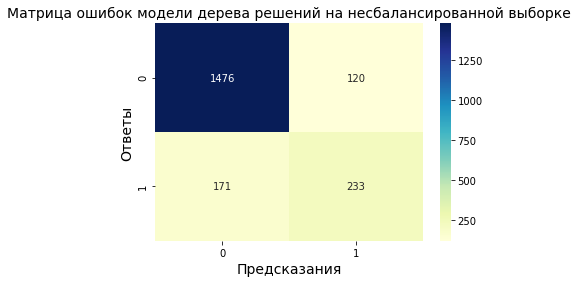

In [516]:
heatmap_confusion_matrix(prediction_tree_test, name='Матрица ошибок модели дерева решений на несбалансированной выборке', 
                         target=target_test)
plt.show()

Протестируем модель случайного леса на тестовой выборке. Метрики F1=0,61 на модели случайного леса удалось добится при обучении модели на сбалансированных данных. Применим модель для тестовой выборки. 

In [517]:
best_model_forest

RandomForestClassifier(max_depth=18, min_samples_split=8, n_estimators=84,
                       random_state=5)

In [518]:
predict_forest_test = best_model_forest.predict(features_test)

metrics_model(best_model_forest, features=features_test, target=target_test)

,metric_result
AUC-ROC,0.864409
F1,0.631961
Accuracy,0.848000


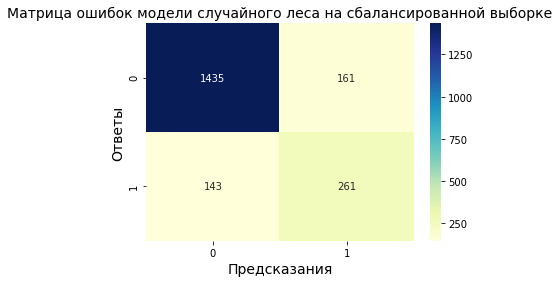

In [519]:
heatmap_confusion_matrix(predict_forest_test, name='Матрица ошибок модели случайного леса на сбалансированной выборке', 
                         target=target_test)
plt.show()

Предсказания модели случайного леса дают больше истинно-положительных ответов (261) по сравнению с моделью дерева решений (233).  
Удалось достичь метрики F1 - 0,638 при тестировании модели случаного леса.

**Вывод**
***
- При тестировании моделей удалось достичь метрики F1 > 0,59 на двух моделях:   
     -  модели дерева решений с гиперпараметрами class_weight={0: 0.4, 1: 0.6}, max_depth=9, min_samples_leaf=6, min_samples_split=72, random_state=5 и обучении на выборках без учета баланса классов. F1 составила 0,61.  
     -  модели случайного леса, обученной на сбалансированных данных путем уменьшения класса 0 в 0,7 раз и увеличения класса 1 в 2 раза. F1 составила 0,638.

## Вывод

Целью нашего исследования было подобрать модель, предсказывающую уход клиента из банка.   
Для этого, в рамках решения задачи классификации было проведено обучение трех моделей:

- дерева решений - DecisionTreeClassifier,
- случайного леса - RandomForestClassifier,
- логистической регрессии - LogisticRegression.  

Для оценки предсказаний полученных моделей была использована метрики F1, AUC-ROC и ROC-кривая, а так же матрица ошибок. 

Для обучения, предсказания и тестирования моделей исходный датасет был разделен на три выборки в пропорции 60:20:20%.

Признаки 'credit_score', 'age', 'balance', 'estimated_salary', 'tenure' имели большие различия в средних значениях и диапазонах этих значений. Для того, чтобы привести данные к единому масштабу была проведена стандартизация признаков с помощью Sklearn.preprocessing.StandardScaler().  

При обучении моделей без учета дисбаланса целевого признака лучшей моделью стала модель дерева решений с гиперпараметрами (max_depth=12, min_samples_leaf=6, min_samples_split=72,random_state=5), и с F1=0,62 и AUC-ROC 0.84. Матрица ошибок показала результат в 1727 истинных прогноза и 273 ложных.
Результаты остальных моделей следующие:  

- Модель случайного леса с гиперпараметрами (max_depth=18, min_samples_split=8, n_estimators=84, random_state=5) достигла метрик F1 - 0.591, AUC-ROC - 0.866. Истиных прогнозов 1747, ложных - 259. Из 394 ответов класса 1 - 187 истинно положительных.

- Модель логистической регрессии с гиперпараметрами penalty='l2', random_state=5, solver='lbfgs', C=3 показала худший результат метрики F1-0.28. Истинных предсказаний целевого признака 0 - 1548, 1 - 76.  

В исходном датасете целевой признак не сбалансирован. Соотношение классов 0 и 1 4:1. Для борьбы с дисбалансом класса были применены следующие способы:
- гиперпараметр class_weight: 'balanced' и {0: 0.3, 1: 0.7}.
- увеличение редкого класса 1 и уменьшение выборки частого класса 0.

Применение гиперпараметров практически не дало результатов для модели случайного леса. class_weight='balanced' отрицательно сказался на модели дерева решений и метрика F1 упала с 0,62 до 0,57. При этом, применение гиперпараметра сlass_weight={0: 0.3, 1: 0.7} оставил метрику F1 для модели дерева решений на том же уровне - 0,63.

Уменьшение/увеличение выборки класса хорошо повлияло на модель случайного леса: метрика F1 выросла с 0,59 до 0,63 на валидационной выборке.

Тестирование моделей было проведено на тестовой выборке для моделей:
- DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, min_samples_split=39, random_state=5)- обучено на сбалансированных данных
- DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=9, min_samples_leaf=6, min_samples_split=72, random_state=5 - обучено на несбалансированных данных
- RandomForestClassifier(max_depth=18, min_samples_split=8, n_estimators=84, random_state=5) - обучено на сбалансированных данных.

На тестовой выборке лучший результат показала модель случайного леса с F1=0.638 и AUC_ROC=0.86. Модель дерева решений на несбалансированных данных достигла значения метрики F1 = 0,61 с гиперпараметром веса классов. При этом на моделе дерева решений, обученной на сбалансированных данных не удалось достичь метрики F1>0.59, F1 составила 0,59.  

При построении модели наиболее важными факторами являются: 
- age — возраст
- credit_score — кредитный рейтинг
- balance — баланс на счёте
- num_of_products — количество продуктов банка, используемых клиентом
- estimated_salary — предполагаемая зарплата